<center> <h1> Introduction to text Processing for Statistical & Machine Learning Modeling with python</h1> </center>


<center> <h3 href="https://www.linkedin.com/in/gilles-q-hacheme-a0956ab7/">by Gilles HACHEME</h3> </center> 

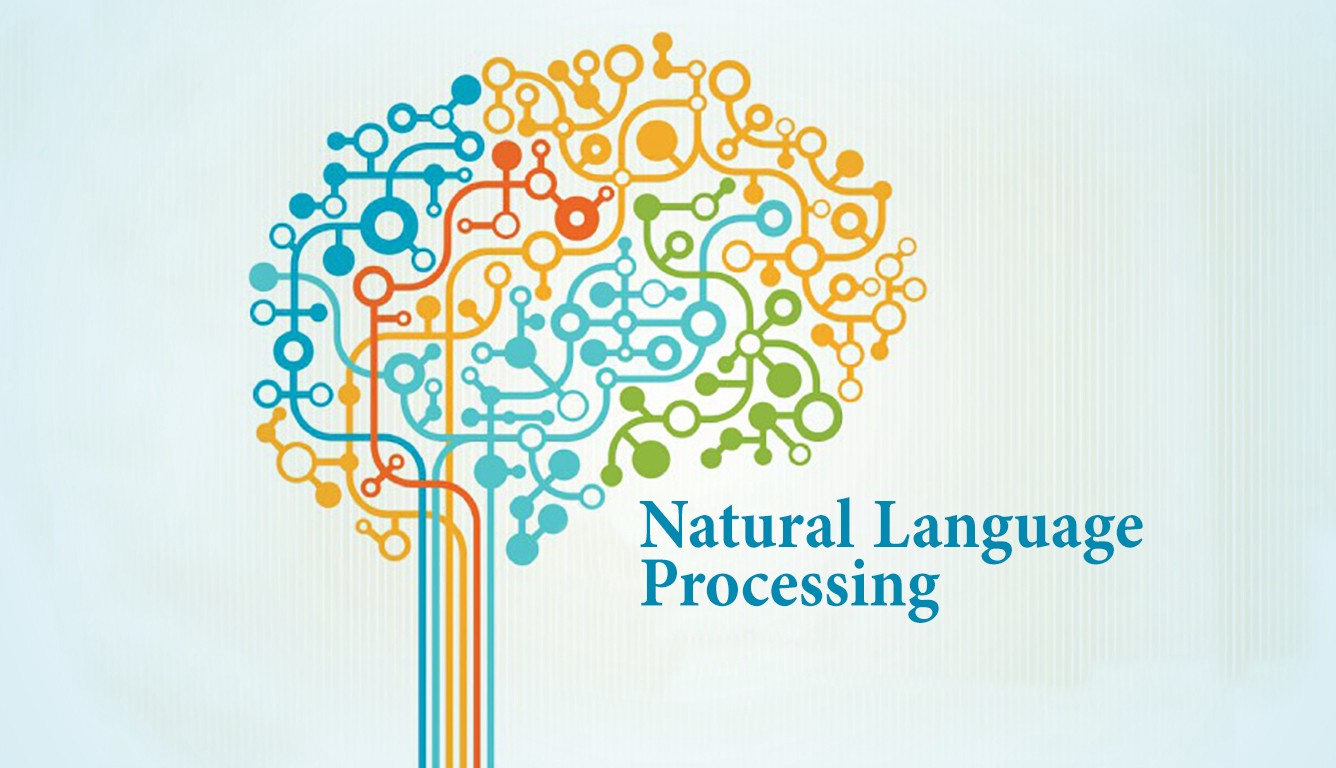

Text processing is part of **Natural Language Processing** (NLP), a subfield in Artificial Intelligence in which the goal is to give to computers or machines the ability to understand human language for different tasks: **spam filtering**, **sentiment analysis**, **machine translation**, **speech recognition**, etc. In  this tutorial, we are simply going to get through **a brief introduction to text processing and analysis**, and how it can be used for **statistical modeling**. 

In this tutorial we use the following tools:

- Python, the currently most used programming language for text processing: See more details on [Python](https://www.python.org/)
- Natural Language Toolkit (NLTK) package for Natural Language Processing: Installation guide can be found on [NLTK](http://nltk.org/install.html)
- Numpy package for Numerical computing: Numpy is generally preinstalled with most of python distributions such as [Anaconda](https://www.anaconda.com/). But for more details go on [Numpy](https://numpy.org/)
- Scikit-learn for Statistical & Machine Learning modeling: See [Scikit-learn](https://scikit-learn.org/stable/install.html) for details on installations if it is not preinstalled on your python distribution. 



An overview of what we are going to cover:

- Text preprocessing :
    - Tokenization: Text tokenization into sentences & Sentence tokenization into words 
    - Stop Words
    - Stemming and Lemmatization 

- Using text in Statistical & Machine Learning modeling 
    - Bag of words (BOW)
    - A practical application 

- Going beyond 

# Text preprocessing

## Tokenization

Tokenization is simply the task of spliting a string into a set of sub-strings named **tokens**. A text can then be tokenized into a set of sentences, and a sentence can be tokenized into a set of words. 

Let's see some examples:

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize

text = """The french economy is resilient to COVID-19. 
But the pandemic still endangered lots of small companies. 
The GDP has fallen like never since World War 2."""

sent_tokenize(text)

['The french economy is resilient to COVID-19.',
 'But the pandemic still endangered lots of small companies.',
 'The GDP has fallen like never since World War 2.']

In [2]:
sent = "The french economy is resilient to COVID-19"
word_tokenize(sent)

['The', 'french', 'economy', 'is', 'resilient', 'to', 'COVID-19']

# Stop Words

Some common words such as **the**, **a** or **some** that generally do not bring any additional information on the meaning of the sentence can be removed in the preprocessing. Here are some:

In [3]:
from nltk.corpus import stopwords
stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [4]:
len(stopwords.words("english"))

179

There are 179 words in the english stop words list we loaded.

Here is a function that tokenizes and filters out stop words:

In [5]:
def token_stop(sent):
    tokens = word_tokenize(sent)
    tokens = [word for word in tokens if word not in stopwords.words("english")]
    
    return tokens

Let us apply it to the sentence we just used before: 

**The** french economy **is** resilient to COVID-19.

We expect the stop word filtering to give the following result: 

[french, economy, resilient, COVID-19]

In [6]:
token_stop(sent)

['The', 'french', 'economy', 'resilient', 'COVID-19']

As you can notice only **is** was filtered out. **The** was not detected as stop word because its first letter is uppercase wheras in the stop word list, all words are lowercase. So before any preprocessing we usually lowercase the string. 

In [7]:
sent = sent.lower()
sent

'the french economy is resilient to covid-19'

In [8]:
token_stop(sent)

['french', 'economy', 'resilient', 'covid-19']

Now everything is fine !

# Stemming and Lemmatization

Stemming is the process of removing the prefix and suffix from a word. The result is the **stem**. There are several algorithms available for this task. One of the most known is the Porter stemmer.

In [9]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem('worked'), stemmer.stem('working'), stemmer.stem('works'))

work work work


Lemmatization is the process of finding the root of a word named **lemma**.

In [10]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('working', pos="n")


'working'

The argument **pos** is the Part Of Speech:

- Noun n
- Adjective a
- Adverb r
- Verb v

It is a good practice to precise the POS while lemmatizing as several lemmas can be found for a given word. 

In [11]:
lemmatizer.lemmatize('working', pos="v")

'work'

# Using text in Statistical & Machine Learning models

## Bag Of Words (BOW)

BOW is very likely the most simple text repreentation algorithm. BOW first builds a vocabulary $V$ of $|V|$ unique words from a given corpus. And secondly, for each word in the vocabulary, and for each document $d \in D$ in a corpus of $|D|$ documents, the algorithm counts the number of times the word is present in the document. We arrive to a frequency matrix of size $D \times V$. 

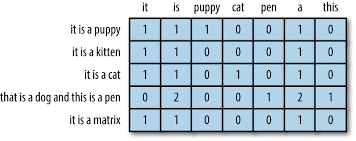 

<center> Source: www.oreilly.com </center>

Let's now do it in python.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

vectorizer = CountVectorizer()

corpus= ["it is a puppy." ,
"it is a kitten.",
"it is a cat.",
"that is a dog and this is a pen.",
"it is a matrix."]



#A funtion to generate a list of vocabulary word ordered according to their position
def get_ordered_vocab(vectorizer):
    vocab0 = vectorizer.vocabulary_.keys()
    vocab1 = list(vocab0)
    for i,word in enumerate(vocab0):
        word_id = list(vectorizer.vocabulary_.values())[i]
        vocab1[word_id] = word

    return vocab1

count = pd.DataFrame(np.around(vectorizer.fit_transform(corpus).todense(),2), columns=get_ordered_vocab(vectorizer), index=corpus)
count

,and,cat,dog,is,it,kitten,matrix,pen,puppy,that,this
it is a puppy.,0,0,0,1,1,0,0,0,1,0,0
it is a kitten.,0,0,0,1,1,1,0,0,0,0,0
it is a cat.,0,1,0,1,1,0,0,0,0,0,0
that is a dog and this is a pen.,1,0,1,2,0,0,0,1,0,1,1
it is a matrix.,0,0,0,1,1,0,1,0,0,0,0


As you may notice, we don't have the same matrix as the one in the image.

What's going wrong? The vocabulary is larger than what we see in the image including words like **kitten**.  It automatically filters out **a** as it is a one character string. So now, how do we get the matrix on the image? We just need to feed the vectorizer with our own vocabulary or stop words.

Using the vocabulary:

In [13]:
vectorizer = CountVectorizer(vocabulary=["it", "is", "puppy", "cat", "pen", "a", "this"], token_pattern='(?u)\\b\\w\\w*\\b')

corpus= ["it is a puppy." ,
"it is a kitten.",
"it is a cat.",
"that is a dog and this is a pen.",
"it is a matrix."]



count = pd.DataFrame(np.around(vectorizer.fit_transform(corpus).todense(),2), columns=get_ordered_vocab(vectorizer), index=corpus)
count

,it,is,puppy,cat,pen,a,this
it is a puppy.,1,1,1,0,0,1,0
it is a kitten.,1,1,0,0,0,1,0
it is a cat.,1,1,0,1,0,1,0
that is a dog and this is a pen.,0,2,0,0,1,2,1
it is a matrix.,1,1,0,0,0,1,0


So now, we have exactly the same matrix on the image.

## Bag Of Words with Term Frequency-Inverse Document Frequency (TF-IDF)

Till now, we just considered the count of words in the vectorization process. 

But we all know that some very common words (sometimes out of usual stop words) are nonetheless useless to get the meaning of a text. 

It is then time for **TF-IDF** to enter into the game. TF-IDF not only accounts for words (terms) frequencies in a text but also for their frequencies in the whole corpus: more the term is frequent in a document, more it is important but if it appears in most of documents in the corpus, its relative importance will be lowered. 

For instance, if we are using a medical corpus, the word **Doctor** could appear very frequently in the documents, so it would not be considered as a word caracterizing a particular document in the corpus. But if the word **surgeon** appears very often in one or some of the documents and is less common in others, then we can say that this/these documents are related to **surgeries**.  

If we are using a general purpose corpus, then it would be likely that the word **Doctor** is scarce enough in the whole corpus to be an important attribute in documents in which it appears often. Here is the TF-IDF definition:

$$\text{tfidf}( t, d, D ) = \text{tf}( t, d ) \times \text{idf}( t, D )$$
	
where $t$ is a term (word); $d$ is a document; $D$ is a corpus (a set of documents). $\text{tf}( t, d )$ is the Term Frequency (TF), defined as follows:
$$ \text{tf}(t,d) = \dfrac{\text{f}(t,d)+1}{x},$$

where $\text{f}(t,d)$ is the frequency of term $t$ in document $d$; $x$ the L2 norm of the count vector. 

$\text{idf}( t, D )$ is the Inverse Document Frequency and is defined as follows : 
	$$\text{idf}( t, D ) = \log \dfrac{ | D  |}{ |  \{ d \in D : t \in d \}  | },$$ where $| D  |$ is the number of documents; $ |  \{ d \in D : t \in d \}  | $ is the number of documents in which $t$ appears. 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 

vectorizer = TfidfVectorizer(token_pattern='(?u)\\b\\w\\w*\\b')



tfidf = pd.DataFrame(np.around(vectorizer.fit_transform(corpus).todense(),2), columns=get_ordered_vocab(vectorizer), index=corpus)
tfidf

,a,and,cat,dog,is,it,kitten,matrix,pen,puppy,that,this
it is a puppy.,0.36,0.00,0.00,0.00,0.36,0.42,0.00,0.00,0.00,0.75,0.00,0.00
it is a kitten.,0.36,0.00,0.00,0.00,0.36,0.42,0.75,0.00,0.00,0.00,0.00,0.00
it is a cat.,0.36,0.00,0.75,0.00,0.36,0.42,0.00,0.00,0.00,0.00,0.00,0.00
that is a dog and this is a pen.,0.37,0.38,0.00,0.38,0.37,0.00,0.00,0.00,0.38,0.00,0.38,0.38
it is a matrix.,0.36,0.00,0.00,0.00,0.36,0.42,0.00,0.75,0.00,0.00,0.00,0.00


As you can notice for instance in the first sentence, the word **puppy** is given more weight than the words **it**, **is** or **a**.

## Including word collocations

Sometimes words are not enough to extract a text meaning. Expression of two or more words can bring supplementary information. They are named **colocations** or **n-gram**.

Here is an example with python:

In [15]:
from nltk.collocations import BigramCollocationFinder
from nltk.tokenize import word_tokenize

sent = "it is a puppy"

bcf = BigramCollocationFinder.from_words(word_tokenize(sent))
print(sent, "\n", list(bcf.ngram_fd))

it is a puppy 
 [('it', 'is'), ('is', 'a'), ('a', 'puppy')]


# A practical application

Now let us show with a practical exemple the benefit of using textual data. We collected from [Pole Emploi](https://www.pole-emploi.fr/accueil/) -the french employment agency- some job ads using their official [API](https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html). We have done some preprocessing on the collected data. These are the variables we are going to use in this application:
- meanwage: the average proposed wage. It is the average between the minimum and the maximum wage proposed in the ad, 
- title & description: title and description of the ad,
- gpsLatitude & gpsLongitude: Latitude and longitude of the company,
- isPartTimeWorking: 1 if it is a part-time job; 0 otherwise,
- worktime: number of work hours per week,
- experience: number of years of experience; can be lower than 1 if it is lower than 12 months,
- cdi: 1 if it is a permanent position; 0 otherwise.

Here, we are interested in predicting the meanwage. 

Let's load now the data:

In [16]:
df = pd.read_csv("pole_emploi.csv")
df.head()

,meanwage,title,description,gpsLatitude,gpsLongitude,isPartTimeWorking,worktime,experience,cdi
0,10.150000,Valet / Femme de chambre,"Au sein d'un domaine, vous êtes en charge : l...",43.451667,4.428056,0.0,35.0,1.0,0
1,10.150000,Aide agricole en production végétale,Vous serez en charge du poste d'Aide agricole ...,43.882500,4.855000,0.0,35.0,1.0,0
2,10.150000,Ouvrier / Ouvrière agricole en maraîchage-hort...,"A compter du 1er août, vous aurez en charge la...",43.676944,4.628611,0.0,35.0,0.5,0
3,11.746795,Commis / Commise de salle (H/F),Il/elle participe à la mise en place du servic...,43.726944,4.708889,0.0,39.0,1.0,1
4,13.892857,Agent d'entretien maintenance polyvalent (H/F),Il/elle effectue des travaux d'entretien (plom...,43.726944,4.708889,0.0,35.0,1.0,1


We concatenate titles and descriptions to have one textual element per line. 

In [17]:
df["text"] = df.title + " " + df.description 
df.head()

,meanwage,title,description,gpsLatitude,gpsLongitude,isPartTimeWorking,worktime,experience,cdi,text
0,10.150000,Valet / Femme de chambre,"Au sein d'un domaine, vous êtes en charge : l...",43.451667,4.428056,0.0,35.0,1.0,0,"Valet / Femme de chambre Au sein d'un domaine,..."
1,10.150000,Aide agricole en production végétale,Vous serez en charge du poste d'Aide agricole ...,43.882500,4.855000,0.0,35.0,1.0,0,Aide agricole en production végétale Vous sere...
2,10.150000,Ouvrier / Ouvrière agricole en maraîchage-hort...,"A compter du 1er août, vous aurez en charge la...",43.676944,4.628611,0.0,35.0,0.5,0,Ouvrier / Ouvrière agricole en maraîchage-hort...
3,11.746795,Commis / Commise de salle (H/F),Il/elle participe à la mise en place du servic...,43.726944,4.708889,0.0,39.0,1.0,1,Commis / Commise de salle (H/F) Il/elle partic...
4,13.892857,Agent d'entretien maintenance polyvalent (H/F),Il/elle effectue des travaux d'entretien (plom...,43.726944,4.708889,0.0,35.0,1.0,1,Agent d'entretien maintenance polyvalent (H/F)...


Let's have some insight of the most frequent words with a **word cloud**.

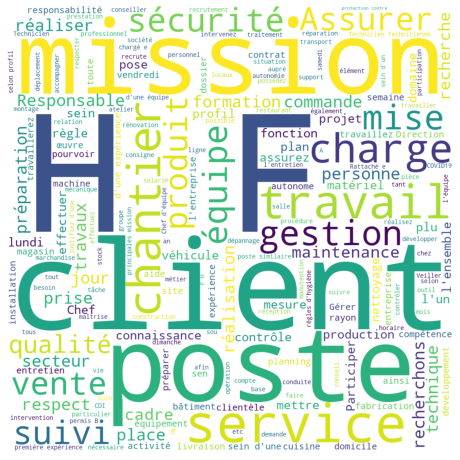

In [18]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.corpus import stopwords


stop_words = stopwords.words('french')

text = " ".join(df.text)

wc = WordCloud(random_state=2,
               relative_scaling=0.2, min_font_size =10 ,background_color='white', width=1000, height=1000, stopwords=stop_words, collocation_threshold=20)

#frequences = dict(aspects_df.words_imp[i] )
wc.generate_from_text(text)

plt.figure(figsize=(8,12))
plt.axis("off")
plt.imshow(wc) 
plt.show()

Now, let's vectorize textual data using TF-IDF. We only select the vocabulary words that appear at least 20 times in the whole corpus. It is to filter out noisy words. This thredshold can be chosen with further descriptive statistics. We include also most important bigrams. 

In [19]:
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=20, ngram_range=(1, 2))
text_tfidf = pd.DataFrame(vectorizer.fit_transform(df.text).todense(), columns=vectorizer.vocabulary_)
text_tfidf.sample(15, random_state=1)

,valet,femme,chambre,sein,domaine,charge,nettoyage,rangement,remise,état,...,candidature présenter,agence montpon,besançon,valence,chartres,brest,quimper,nîmes,toulouse recherche,toulousaine
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
7673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
7540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.070049,0.000000,0.125303,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.051897,0.065338,0.0
2270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.110470,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.078080,0.122089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


We are going to train a model without textual data, and another with it to compare the Mean Square Errors (MSE). Comparison is done out-of-sample with a test data of 33%, after training on the other 77%. 

$$
meanwage = f(X) + \epsilon, \text{  (1)}
$$

$$
meanwage = f(X, \text{tfidf}) + \epsilon, \text{  (2)},
$$

where $X$ is the set of non textual regressors, tfidf is the set of textual regressors vectorized by TF-IDF. 

We choose here the **Gradient Boosting** algorithm to train and compare both models.
We first create the **X** matrix below:

In [20]:
X = df.loc[:, ["gpsLatitude", "gpsLongitude", "isPartTimeWorking", "worktime", "experience", "cdi"]]
X.columns = ["X_"+col for col in X.columns]
X.head()

,X_gpsLatitude,X_gpsLongitude,X_isPartTimeWorking,X_worktime,X_experience,X_cdi
0,43.451667,4.428056,0.0,35.0,1.0,0
1,43.882500,4.855000,0.0,35.0,1.0,0
2,43.676944,4.628611,0.0,35.0,0.5,0
3,43.726944,4.708889,0.0,39.0,1.0,1
4,43.726944,4.708889,0.0,35.0,1.0,1


And the **X_text** matrix which is the concatenation of **X** with the textual regressors. 

In [21]:
X_text = pd.concat([X, text_tfidf], axis=1)
X_text.head()

,X_gpsLatitude,X_gpsLongitude,X_isPartTimeWorking,X_worktime,X_experience,X_cdi,valet,femme,chambre,sein,...,candidature présenter,agence montpon,besançon,valence,chartres,brest,quimper,nîmes,toulouse recherche,toulousaine
0,43.451667,4.428056,0.0,35.0,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43.882500,4.855000,0.0,35.0,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,43.676944,4.628611,0.0,35.0,0.5,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43.726944,4.708889,0.0,39.0,1.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.726944,4.708889,0.0,35.0,1.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We declare **meanwage** as **y**, our target variable.

In [22]:
y = df["meanwage"]

We make a train test split for **X**, **X_text** and **y**.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, X_text_train, X_text_test , y_train, y_test = train_test_split(X, X_text, y, test_size=0.33, random_state=1)


Now let's train! The **Gradient Boosting** is trained with a learning rate of 0.1 and 100 rounds.

In [24]:
import xgboost

model = xgboost.train(params={"learning_rate": 0.1}, dtrain=xgboost.DMatrix(X_train, label=y_train), num_boost_round=100)


In [25]:
y_hat = model.predict(xgboost.DMatrix(X_test))
mse = np.mean((y_test - y_hat)**2)
mse

14.776227300819423

In [26]:
model_text =  xgboost.train(params={"learning_rate": 0.1}, dtrain=xgboost.DMatrix(X_text_train, label=y_train), num_boost_round=100)

In [27]:
y_text_hat = model_text.predict(xgboost.DMatrix(X_text_test))
mse_text = np.mean((y_test - y_text_hat)**2)
mse_text

10.359287804172933

We can notice a clear improvement of the MSE when using textual data **(14.776 VS 10.359)**. This can surely be further improved with deeper data preprocessing on the textual data. 

# Going Beyond

Of course this is just a brief introduction to text processing. So, if you want to go deeper and discover more of the exciting world of NLP, I recommend you the following books: 

- [Python 3 Text Processing with NLTK 3 Cookbook](https://www.packtpub.com/product/python-3-text-processing-with-nltk-3-cookbook/9781782167853) by **Jacob Perkins**,
- [Natural Language Processing with Python](http://www.nltk.org/book_1ed/) by **Steven Bird**, **Ewan Klein**, and **Edward Loper**,
- [Deep Learning for Natural Language Processing: Creating Neural Networks with Python](https://www.amazon.fr/Deep-Learning-Natural-Language-Processing/dp/148423684X) by **Palash Goyal**, **Sumit Pandey** and **Karan Jain**.


If you are new to python and want to get introduced, you can follow this tutorial: [Introduction to Python for Data Science](https://towardsdatascience.com/introduction-to-python-for-data-science-6d1dba7c305c).